#### 1. 패키지 설치

In [ ]:
%pip install -q -U langchain langchain-ollama langgraph

#### 로컬 Ollama로 설치한 deepseek-r1 모델과 ExaOne3 모델을 사용하기
##### ollama run deepseek-r1:7b
##### ollama run exaone3.5

##### 최신버전 LangChain에서는 ChatOllama와 RunnableSequence(prompt | llm) 를 사용

##### deepseeek 모델 9.9 와 9.11 크기 비교문제  (영어로 질문, invoke()함수)

In [1]:
import requests

response = requests.get("http://127.0.0.1:11434")
print(response.text)

Ollama is running


In [2]:
from langchain_ollama import ChatOllama

try:
    deepseek = ChatOllama(model="deepseek-r1:1.5b", temperature=0.5)    # 모델 호출
    response = deepseek.invoke("which is bigger between 9.9 and 9.11?")
    print(response.content)
except Exception as e:
    print(f"Error: {e}")

<think>
First, I need to compare the two numbers: 9.9 and 9.11.

Both numbers have the same whole number part, which is 9.

To make an accurate comparison, I'll consider their decimal parts.

In 9.9, the decimal part is .9, while in 9.11, it's .11.

Since .9 is equivalent to .90, comparing .90 and .11 shows that .90 is larger than .11.

Therefore, 9.9 is greater than 9.11.
</think>

To determine which number is larger between **9.9** and **9.11**, follow these steps:

1. **Compare the Whole Numbers:**
   - Both numbers have the same whole number part, which is **9**.

2. **Compare the Decimal Parts:**
   - **9.9** has a decimal part of **0.9**.
   - **9.11** has a decimal part of **0.11**.

3. **Convert to Equal Decimal Places for Comparison:**
   - To make comparison easier, write both decimals with two places:
     - **9.9** becomes **9.90**
     - **9.11** remains **9.11**

4. **Compare the Converted Decimals:**
   - Compare **9.90** and **9.11**.
   - Since **9.90 > 9.11**, it foll

##### exaone3.4 모델 9.9 와 9.11 크기 비교문제  (한글로 질문, invoke()함수)

In [17]:
from langchain_ollama import ChatOllama

try:
    qwen = ChatOllama(model="qwen2.5:1.5b", temperature=0.3, n_gpu_layers=0, batch_size=128)
    #exaone = ChatOllama(model="exaone3.5:2.4b", temperature=0.5)
    # 모델 호출
    response = qwen.invoke("9.9와 9.11 중 무엇이 더 큰가요?")
    print(response.content)
except Exception as e:
    print(f"Error: {e}")

9.9와 9.11 중에서 더 큰 수는 9.9입니다.

이 두 숫자를 비교하기 위해선, 소수점 아래의 자릿수에 대한 규칙을 기억하는 것이 중요합니다:

1. 소수점 아래의 가장 작은 자리가 0일 때:
   - 9.9 > 9.11

2. 소수점 아래의 가장 큰 자리가 1일 때:
   - 9.9 < 9.11

3. 다른 경우는 항상 더 큰 숫자를 가집니다.

따라서, 9.9와 9.11 사이에는 0.8의 차이가 있습니다. 이는 9.9보다 9.11에 더 크다는 것을 의미합니다.

따라서, 9.9 > 9.11입니다.


##### deepseeek 모델 9.9 와 9.11 크기 비교문제  (영어로 질문, stream()함수)

In [12]:
from IPython.display import display, Markdown
from langchain_ollama import ChatOllama

deepseek = ChatOllama(model="deepseek-r1:1.5b", temperature=0.5)

answer = []
for chunk in deepseek.stream("which is bigger between 9.9 and 9.11?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)


<think>
First, I need to compare the two numbers: 9.9 and 9.11.

I'll start by aligning their decimal places. To make a fair comparison, I can write 9.9 as 9.90.

Now, both numbers have the same whole number part, which is 9.

Next, I'll compare the tenths place. In 9.90, the tenths digit is 9, while in 9.11, it's 1. Since 9 is greater than 1, 9.90 is larger than 9.11.

Therefore, 9.9 is bigger than 9.11.
</think>

To determine which number is larger between **9.9** and **9.11**, let's compare them step by step.

### Step 1: Align the Decimal Places
First, it's helpful to write both numbers with the same number of decimal places for a clear comparison:

- **9.9** can be written as **9.90**
- **9.11** remains **9.11**

### Step 2: Compare Digit by Digit
Now, compare each corresponding digit from left to right.

| Place Value | 9.90 | 9.11 |
|-------------|------|------|
| Ones        | 9    | 9    |
| Tenths      | 9    | 1    |
| Hundredths  | 0    | 1    |

- **Ones place:** Both numb

In [ ]:

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))

##### deepseeek 모델 9.9 와 9.11 크기 비교문제  (한글로 질문, stream()함수)

In [ ]:
from IPython.display import display, Markdown
from langchain_ollama import ChatOllama

deepseek = ChatOllama(model="deepseek-r1:1.5b", temperature=0.5)

answer = []
for chunk in deepseek.stream("9.9와 9.11 중 무엇이 더 큰가요?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))

##### Exaone 모델 9.9 와 9.11 크기 비교문제  (한글로 질문, stream()함수)

In [ ]:
from langchain_ollama import ChatOllama

#model = ChatOllama(model="exaone3.5:2.4b", temperature=0.5)
model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)

answer = []
for chunk in model.stream("9.9와 9.11 중 무엇이 더 큰가요?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))


#### DeepSeek의 추론 능력과 ExaOne의 한글 생성 능력 결합하기
* DeepSeek는 태그 안에서 이루어지는 추론을 기반으로 다른 LLM 대비 높은 성능을 발휘합니다.
* 하지만 Ollama에서 제공하는 deepseek r1-distill-qwen 모델은 한국어 생성 능력이 부족합니다.
* DeepSeek의 추론 능력과 ExaOne의 한글 생성 능력 결합해 보겠습니다.

In [1]:
from langchain_ollama import ChatOllama

reasoning_model = ChatOllama(model="deepseek-r1:1.5b", temperature=0, stop=["</think>"])
print(reasoning_model)

model='deepseek-r1:1.5b' temperature=0.0 stop=['</think>']


In [2]:
#generation_model = ChatOllama(model="exaone3.5:2.4b", temperature=0.7)
generation_model = ChatOllama(model="qwen2.5:1.5b", temperature=0.7)
print(generation_model)

model='qwen2.5:1.5b' temperature=0.7


#### LangGraph 로 연결하기

In [3]:
from langgraph.graph import START, StateGraph
from typing_extensions import TypedDict
from langchain_core.prompts import ChatPromptTemplate

#LangGraph에서 State 사용자정의 클래스는 노드 간의 정보를 전달하는 틀입니다. 
#노드 간에 계속 전달하고 싶거나, 그래프 내에서 유지해야 할 정보를 미리 정의힙니다. 
class State(TypedDict):
    question: str
    thinking: str
    answer: str

answer_prompt = ChatPromptTemplate([
    (
        "system",
        """
        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.

        당신의 작업은 다음과 같습니다:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.

        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.

        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.
        """
    ),
    (
        "human",
        """
        질문: {question}
        추론: {thinking}
        """
    )
])
print(answer_prompt)

input_variables=['question', 'thinking'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='\n        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.\n\n        당신의 작업은 다음과 같습니다:\n        - 질문과 제공된 추론을 신중하게 분석하세요.\n        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.\n        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.\n        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.\n\n        지침:\n        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.\n        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.\n        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.\n        - 도움이 되고 전문적인 톤을 유지하세요.\n\n        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.\n        '), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question', 'thinking'], input_types={}, partial_variables={}, template='\n        질문: {question}\n        추론: {thinking}\n        '), additional_kwargs={})]


In [ ]:
#DeepSeek를 통해서 추론 부분까지만 생성합니다. (node)
# 딥식의 수행한 결과를 thinking 부분으로 줌
# 이후 generation 모델에 prompt에 tinking 부분에 딥식 결과를 넣고 
# answer 부분에 qwen의 답변의 결과를 넣어 줌

def think(state: State):
    question = state["question"]
    response = reasoning_model.invoke(question)
    #print(response.content)
    return {"thinking": response.content}

#Qwen를 통해서 결과 출력 부분을 생성합니다.
def generate(state: State):
    messages = answer_prompt.invoke({"question": state["question"], "thinking": state["thinking"]})
    response = generation_model.invoke(messages)
    print(response.content)
    return {"answer": response.content}

# 그래프 컴파일
graph_builder = StateGraph(State).add_sequence([think, generate]) # 함수 처리 순서 think 함수를 먼저 처리
graph_builder.add_edge(START, "think") # 연결하는 거 tinking 추론하는 것 부터 수행,  연결되는 중간 값이 think 부분이 연결이 됨
print(type(graph_builder))
graph = graph_builder.compile()
print(type(graph))

<class 'langgraph.graph.state.StateGraph'>
<class 'langgraph.graph.state.CompiledStateGraph'>


In [9]:

# 입력 데이터
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

# invoke()를 사용하여 그래프 호출
result = graph.invoke(inputs)
print(result)

# 결과 출력
print("==> 생성된 답변: \n")
print(result["answer"])

9.9 is greater than 9.11 because even though they have the same whole number part (9), the decimal part shows a clear difference. The tenth place in 9.90 is 9, which is greater than 1 in the tenths place of 9.11, making 9.90 greater than 9.11.

To break it down further:
- Both numbers have the same whole number part: 9.
- The decimal places show a comparison: 9.90 vs 9.11.
- In the tenths place, 9 is larger than 1 in 9.11.

Therefore, 9.9 is greater than 9.11 because of this clear distinction in the tenths place.
{'question': '9.9와 9.11 중 무엇이 더 큰가요?', 'thinking': "<think>\nFirst, I need to compare the two numbers: 9.9 and 9.11.\n\nBoth numbers have the same whole number part, which is 9.\n\nTo make a fair comparison, I'll align them by adding an extra decimal place to 9.9, making it 9.90.\n\nNow, both numbers are 9.90 and 9.11.\n\nComparing each digit from left to right:\n\n- The whole number part is the same (9).\n- In the tenths place, 9 is greater than 1.\n  \nSince 9 in the tenths 

In [10]:
import os
import sys
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

# UTF-8 인코딩 강제 설정 (Jupyter 노트북 호환)
os.environ['PYTHONIOENCODING'] = 'utf-8'
os.environ['LANG'] = 'ko_KR.UTF-8'
os.environ['LC_ALL'] = 'ko_KR.UTF-8'

# Jupyter 환경에서는 reconfigure 대신 환경변수로 처리
try:
    if hasattr(sys.stdout, 'reconfigure') and sys.stdout.encoding != 'utf-8':
        sys.stdout.reconfigure(encoding='utf-8')
except (AttributeError, OSError):
    # Jupyter 노트북이나 다른 환경에서는 패스
    pass

# 모델 초기화 - 한글 처리 개선
reasoning_model = ChatOllama(
    model="deepseek-r1:1.5b", 
    temperature=0, 
    stop=["</think>"]
)

generation_model = ChatOllama(
    model="qwen2.5:1.5b", 
    temperature=0.7
)

# LangGraph State 정의
class State(TypedDict):
    question: str
    thinking: str
    answer: str

# 개선된 프롬프트 템플릿
answer_prompt = ChatPromptTemplate([
    (
        "system",
        """당신은 한국어로 응답하는 AI 어시스턴트입니다. 
        반드시 한국어로만 답변하세요.
        
        당신의 작업:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 한국어 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.
        
        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.
        
        중요: 반드시 한국어로만 응답하세요."""
    ),
    (
        "human",
        """질문: {question}
        
        추론 과정: {thinking}
        
        위 내용을 바탕으로 한국어로 답변해주세요:"""
    )
])

def ensure_utf8_string(text):
    """문자열이 UTF-8로 제대로 인코딩되었는지 확인하고 변환"""
    if text is None:
        return ""
    if isinstance(text, bytes):
        return text.decode('utf-8', errors='ignore')
    return str(text)

# DeepSeek를 통해서 추론 부분까지만 생성
def think(state: State):
    question = state["question"]
    print(f"[DEBUG] 입력 질문: {question}")
    print(f"[DEBUG] 질문 타입: {type(question)}")
    
    response = reasoning_model.invoke(question)
    thinking_content = ensure_utf8_string(response.content)
    
    print(f"[DEBUG] 추론 결과 타입: {type(response.content)}")
    print(f"[DEBUG] 추론 결과 길이: {len(thinking_content)}")
    print(f"[DEBUG] 추론 결과 미리보기: {thinking_content[:200]}...")
    
    return {"thinking": thinking_content}

# qwen2.5를 통해서 결과 출력 부분을 생성
def generate(state: State):
    question = ensure_utf8_string(state["question"])
    thinking = ensure_utf8_string(state["thinking"])
    
    print(f"[DEBUG] generate 함수 - 질문: {question}")
    print(f"[DEBUG] generate 함수 - 추론 길이: {len(thinking)}")
    print(f"[DEBUG] generate 함수 - 추론 미리보기: {thinking[:200]}...")
    
    messages = answer_prompt.invoke({
        "question": question, 
        "thinking": thinking
    })
    
    print(f"[DEBUG] 프롬프트 메시지 생성 완료")
    
    response = generation_model.invoke(messages)
    answer_content = ensure_utf8_string(response.content)
    
    print(f"[DEBUG] 최종 응답 타입: {type(response.content)}")
    print(f"[DEBUG] 최종 응답 길이: {len(answer_content)}")
    print(f"[DEBUG] 최종 응답 내용: {answer_content}")
    
    return {"answer": answer_content}

# 그래프 구성 및 컴파일
graph_builder = StateGraph(State).add_sequence([think, generate])
graph_builder.add_edge(START, "think")
graph = graph_builder.compile()

def main():
    # 입력 데이터
    inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}
    
    print("="*50)
    print("LangGraph 실행 시작")
    print("="*50)
    
    try:
        # invoke()를 사용하여 그래프 호출
        result = graph.invoke(inputs)
        
        print("="*50)
        print("실행 결과")
        print("="*50)
        print(f"전체 결과: {result}")
        print(f"최종 답변: {result.get('answer', '답변 없음')}")
        
    except Exception as e:
        print(f"오류 발생: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

LangGraph 실행 시작
[DEBUG] 입력 질문: 9.9와 9.11 중 무엇이 더 큰가요?
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 556
[DEBUG] 추론 결과 미리보기: <think>
First, I need to compare the two numbers: 9.9 and 9.11.

Both numbers have the same whole number part, which is 9.

To make a fair comparison, I'll align them by adding an extra decimal place ...
[DEBUG] generate 함수 - 질문: 9.9와 9.11 중 무엇이 더 큰가요?
[DEBUG] generate 함수 - 추론 길이: 556
[DEBUG] generate 함수 - 추론 미리보기: <think>
First, I need to compare the two numbers: 9.9 and 9.11.

Both numbers have the same whole number part, which is 9.

To make a fair comparison, I'll align them by adding an extra decimal place ...
[DEBUG] 프롬프트 메시지 생성 완료
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 349
[DEBUG] 최종 응답 내용: 이 질문의 추론 과정과 결과를 정확하게 이해하고 설명하겠습니다:

먼저, 두 숫자인 9.9와 9.11가 무엇보다 크는지 비교해야 합니다.

먼저, 이 숫자들을 모두 다룰 수 있도록 하여, 9.9을 9.90으로 변환합니다. 이렇게 해서 9.9과 9.11를 정확하게 비교할 수 있습니다.

이제 두 숫자가 9.90과 9.11로 나타납니다.

다음은 각 자리에서 숫자를 비교하는 순서입니다:

- 전체 소수부는 

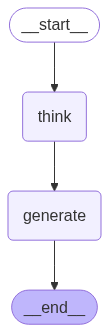

In [11]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)        
    )
)

In [ ]:
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

async for event in graph.astream_events(inputs, version="v2"):
    kind = event["event"]
    if kind == "on_chat_model_stream":
        print(event['data']['chunk'].content, end="", flush=True)

In [ ]:
import gradio as gr
import os
import sys
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

# UTF-8 인코딩 강제 설정 (Jupyter 노트북 호환)
os.environ['PYTHONIOENCODING'] = 'utf-8'
os.environ['LANG'] = 'ko_KR.UTF-8'
os.environ['LC_ALL'] = 'ko_KR.UTF-8'

# Jupyter 환경에서는 reconfigure 대신 환경변수로 처리
try:
    if hasattr(sys.stdout, 'reconfigure') and sys.stdout.encoding != 'utf-8':
        sys.stdout.reconfigure(encoding='utf-8')
except (AttributeError, OSError):
    # Jupyter 노트북이나 다른 환경에서는 패스
    pass

# 모델 설정: 두 개의 서로 다른 모델을 사용하여 추론과 답변 생성을 수행
# - reasoning_model: 추론을 담당하는 모델 (온도 낮음, 정확한 분석용)
# - generation_model: 답변 생성을 담당하는 모델 (온도 높음, 창의적 응답용)
reasoning_model = ChatOllama(
    model="deepseek-r1:1.5b", 
    temperature=0, 
    stop=["</think>"]
)

generation_model = ChatOllama(
    model="qwen2.5:1.5b", 
    temperature=0.7
)

# 상태(State) 정의: 그래프에서 상태를 유지하기 위한 데이터 구조
class State(TypedDict):
    question: str   # 사용자의 질문
    thinking: str   # 추론 결과
    answer: str     # 최종 답변

# 개선된 프롬프트 템플릿
answer_prompt = ChatPromptTemplate([
    (
        "system",
        """당신은 한국어로 응답하는 AI 어시스턴트입니다. 
        반드시 한국어로만 답변하세요.
        
        당신의 작업:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 한국어 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.
        
        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.
        
        중요: 반드시 한국어로만 응답하세요."""
    ),
    (
        "human",
        """질문: {question}
        
        추론 과정: {thinking}
        
        위 내용을 바탕으로 한국어로 답변해주세요:"""
    )
])


def ensure_utf8_string(text):
    """문자열이 UTF-8로 제대로 인코딩되었는지 확인하고 변환"""
    if text is None:
        return ""
    if isinstance(text, bytes):
        try:
            return text.decode('utf-8')
        except UnicodeDecodeError:
            return text.decode('utf-8', errors='ignore')
    
    # 문자열이지만 인코딩 문제가 있을 수 있는 경우 처리
    if isinstance(text, str):
        try:
            # 문자열을 UTF-8로 인코딩했다가 다시 디코딩하여 정리
            return text.encode('utf-8').decode('utf-8')
        except (UnicodeEncodeError, UnicodeDecodeError):
            return text
    
    return str(text)

# DeepSeek를 통해서 추론 부분까지만 생성
def think(state: State):
    question = state["question"]
    print(f"[DEBUG] 입력 질문: {question}")
    print(f"[DEBUG] 질문 타입: {type(question)}")
    
    response = reasoning_model.invoke(question)
    thinking_content = ensure_utf8_string(response.content)
    
    print(f"[DEBUG] 추론 결과 타입: {type(response.content)}")
    print(f"[DEBUG] 추론 결과 길이: {len(thinking_content)}")
    print(f"[DEBUG] 추론 결과 미리보기: {thinking_content[:200]}...")
    
    return {"thinking": thinking_content}

# qwen2.5를 통해서 결과 출력 부분을 생성
def generate(state: State):
    question = ensure_utf8_string(state["question"])
    thinking = ensure_utf8_string(state["thinking"])
    
    print(f"[DEBUG] generate 함수 - 질문: {question}")
    print(f"[DEBUG] generate 함수 - 추론 길이: {len(thinking)}")
    print(f"[DEBUG] generate 함수 - 추론 미리보기: {thinking[:200]}...")
    
    messages = answer_prompt.invoke({
        "question": question, 
        "thinking": thinking
    })
    
    print(f"[DEBUG] 프롬프트 메시지 생성 완료")
    
    response = generation_model.invoke(messages)
    answer_content = ensure_utf8_string(response.content)
    
    print(f"[DEBUG] 최종 응답 타입: {type(response.content)}")
    print(f"[DEBUG] 최종 응답 길이: {len(answer_content)}")
    print(f"[DEBUG] 최종 응답 내용: {answer_content}")
    
    return {"answer": answer_content}

# 그래프 생성 함수: 상태(State) 간의 흐름을 정의
def create_graph():
    graph_builder = StateGraph(State).add_sequence([think, generate])
    graph_builder.add_edge(START, "think")
    return graph_builder.compile()

# Gradio 인터페이스 생성 및 실행
def chatbot_interface(message, history):
    graph = create_graph()
    inputs = {"question": message}
    result = graph.invoke(inputs)
    return result["answer"]

iface = gr.ChatInterface(fn=chatbot_interface, title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")

# Gradio 인터페이스 설정
def launch_gradio():
    iface = gr.Interface(fn=chatbot_interface, inputs="text", outputs="text", title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")
    iface.launch()

if __name__ == "__main__":
    #iface.launch()
    launch_gradio()

c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-qc8Qb1Xk-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-qc8Qb1Xk-py3.12\Lib\site-packages\gradio\chat_interface.py:339: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(
c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-qc8Qb1Xk-py3.12\Lib\site-packages\gradio\utils.py:1074: UserWarning: Expected 2 arguments for function <function chatbot_interface at 0x000001779263ACA0>, received 1.
  warnings.warn(
c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-q

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-qc8Qb1Xk-py3.12\Lib\site-packages\gradio\helpers.py:1031: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")


[DEBUG] 입력 질문: 안녕
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 9
[DEBUG] 추론 결과 미리보기: <think>

...
[DEBUG] generate 함수 - 질문: 안녕
[DEBUG] generate 함수 - 추론 길이: 9
[DEBUG] generate 함수 - 추론 미리보기: <think>

...
[DEBUG] 프롬프트 메시지 생성 완료
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 84
[DEBUG] 최종 응답 내용: 안녕하세요! 저는 AI 어시스턴트입니다. 오늘의 날씨怎么样? 어떤 서비스를 찾고 계신가요? 또는 무엇에 도움이 필요하신가요? 알려주시면 감사하겠습니다.


c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-qc8Qb1Xk-py3.12\Lib\site-packages\gradio\helpers.py:1031: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")


[DEBUG] 입력 질문: 오늘의 날씨 ? 알려줘
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 9
[DEBUG] 추론 결과 미리보기: <think>

...
[DEBUG] generate 함수 - 질문: 오늘의 날씨 ? 알려줘
[DEBUG] generate 함수 - 추론 길이: 9
[DEBUG] generate 함수 - 추론 미리보기: <think>

...
[DEBUG] 프롬프트 메시지 생성 완료
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 201
[DEBUG] 최종 응답 내용: 오늘의 날씨는 햇살이 따사 humid하고, 바람이 가벼운 정도입니다. 기온은 상대적으로 낮아서 약간의 체온 변화가 있는 것으로 예상됩니다. 주변 환경에서 물이 많이 축적되어 있을 수 있으므로 충분한 준비를 하고 나와서는 안전하게 활동을 해주세요. 이외에도 여러 가지 요소들이 작용할 수 있으니, 필요한 경우 기상 전문가에게 연락하여 확인하시는 것이 좋겠습니다.


c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-qc8Qb1Xk-py3.12\Lib\site-packages\gradio\helpers.py:1031: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")


[DEBUG] 입력 질문: 친구가 지작이 지루하데.. 집에 갈 수 있는 최적의 방법을 몇개 추천해봐
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 3471
[DEBUG] 추론 결과 미리보기: <think>
Okay, so I'm trying to figure out how to help someone who's feeling down and wants to talk about their situation. They mentioned that their friend is creating something and it's going wrong, w...
[DEBUG] generate 함수 - 질문: 친구가 지작이 지루하데.. 집에 갈 수 있는 최적의 방법을 몇개 추천해봐
[DEBUG] generate 함수 - 추론 길이: 3471
[DEBUG] generate 함수 - 추론 미리보기: <think>
Okay, so I'm trying to figure out how to help someone who's feeling down and wants to talk about their situation. They mentioned that their friend is creating something and it's going wrong, w...
[DEBUG] 프롬프트 메시지 생성 완료
Created dataset file at: .gradio\flagged\dataset1.csv
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 1280
[DEBUG] 최종 응답 내용: 친구가 지작이 지루하지 않게 하는 방법 몇 가지를 제안해보겠습니다.

1. **외출**: 집에서 벗어나 숲이나 공원, 카페 같은 곳에 나가면 새로운 경험을 받아들이면서 시간을 보내는 것이 좋습니다. 자연과의 만남은 스트레스를 줄이고 새로운 감각을 얻게 해줍니다.

2.

c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-qc8Qb1Xk-py3.12\Lib\site-packages\gradio\helpers.py:1031: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")


[DEBUG] 입력 질문: 회사 탈출 방법 10가지
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 9
[DEBUG] 추론 결과 미리보기: <think>

...
[DEBUG] generate 함수 - 질문: 회사 탈출 방법 10가지
[DEBUG] generate 함수 - 추론 길이: 9
[DEBUG] generate 함수 - 추론 미리보기: <think>

...
[DEBUG] 프롬프트 메시지 생성 완료
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 692
[DEBUG] 최종 응답 내용: 회사 탈출 방법은 다양한 상황에 따라 다르지만, 일반적인 경우는 다음과 같습니다:

1. **일시적 불만 처리**: 고객의 불만을 즉시 해결하고 반응하는 것이 중요합니다.
2. **고객 서비스 훼손 방지**: 문제를 일시적으로 손상시키지 않도록 항상 예방해요.
3. **고객 만족도 증가 시키기**: 가능한 한 빠르게 해결하여 고객의 불 satisfaction을 줄입니다.
4. **전략적 대응법**: 여러 경우에 대한 전략적인 대응 방법들을 연구하고 적용합니다.
5. **일시적으로 일정을 잡아두는 것**: 특정 시간대에만 발생하는 불편함을 관리합니다.
6. **일시적으로 기회를 얻기 위한 노력**: 상황이 악화되기 전에 가능한 한 빠르게 이점을 활용하려 합니다.
7. **전략적인 의사결정**: 중요한 결정을 내리는 과정에서의 전략적 접근법입니다.
8. **일시적으로 일정한 시간 동안 유지할 수 있는 방안 찾기**: 불편함이 지속되는 경우, 그동안 필요한 준비를 하려 합니다.
9. **일시적으로 고객 만족을 위한 행동**: 고객에게 최선의 서비스 제공으로 고객 만족도를 높입니다.
10. **전략적 탈출 방식 고려하기**: 가능한 한 많은 이익을 얻는 것을 목표로 하는 전략입니다.

이러한 방법들을 활용하면 회사가 상황에 따라 적절하게 대응할 수

c:\Users\kosta\AppData\Local\pypoetry\Cache\virtualenvs\langchain-app-qc8Qb1Xk-py3.12\Lib\site-packages\gradio\helpers.py:1031: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")


[DEBUG] 입력 질문: kl grade 3이고 , 골극의 개수는 3개, mJSW는 정상 대비 25% 감소율을 보이고 있어, OA가 48개월 내에 진행될 가능성이 60%일 때 종합적진 진단을 해줘.
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 2789
[DEBUG] 추론 결과 미리보기: <think>
Okay, so I'm trying to figure out how to approach this problem about the number of modules in a software project. The user mentioned that for an object-oriented (KO) module, there are 3 module...
[DEBUG] generate 함수 - 질문: kl grade 3이고 , 골극의 개수는 3개, mJSW는 정상 대비 25% 감소율을 보이고 있어, OA가 48개월 내에 진행될 가능성이 60%일 때 종합적진 진단을 해줘.
[DEBUG] generate 함수 - 추론 길이: 2789
[DEBUG] generate 함수 - 추론 미리보기: <think>
Okay, so I'm trying to figure out how to approach this problem about the number of modules in a software project. The user mentioned that for an object-oriented (KO) module, there are 3 module...
[DEBUG] 프롬프트 메시지 생성 완료
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 978
[DEBUG] 최종 응답 내용: 물론이죠! 

본질적으로, 우리 문제를 풀기 위한 전략은 KO 모듈과 mJSW에 대한 정확한 해석부터 시작해야 합니다. 먼저, KO 모듈의 정의와 mJSW는 무엇인지를